In [2]:
import pynq
# from pynq import Overlay
from pynq import BCI_Overlay
from pynq.lib import DMA
from pynq import Xlnk
from pynq import Interrupt
# from pynq import FFTDriver
# from pynq import FIRDriver

import numpy as np
import matplotlib
import math
import pandas as pd
from matplotlib import pyplot as plt
import asyncio
import scipy
from scipy.io import wavfile
from scipy.io import loadmat
import csv
from scipy.signal import lfilter, freqz, firwin
from scipy import signal, stats
import sys
import pandas as pd
sys.path.insert(0, '/home/xilinx/mne-python/')
import mne
import cffi
import timeit
import time

In [3]:
overlay = BCI_Overlay.BCI_Overlay("version3.bit")

0
1
2
3


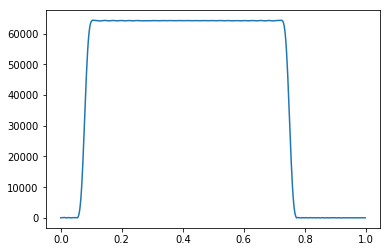

Configuration Complete
Configuration Complete
Configuration Complete
Configuration Complete


In [4]:
N = 9
NFFT = 2**9
matfile = loadmat("/home/xilinx/assets/eeg_data/U001bi.mat")
eeg, f_samp = overlay.matfile_to_dataframe(matfile)

overlay.configure_HW_FFT(True, [ 2, 3, 3, 3, 3, 3], NFFT, f_samp)
overlay.configure_HW_FIR(f_samp, 5, 48, NFFT)

In [6]:

# eeg = pd.read_csv("total_signal.csv")
data = np.array([eeg["P7"],eeg["O1"],eeg["O2"],eeg["P8"]])
# data = eeg["O2"]
data = data[:, 0:f_samp*36] * 100
data = np.asarray(data, np.int32)
overlay.pynq_BCI_DSP(data, NFFT, f_samp, overlap = .25, multichannel=True, plot_data=False)

Number of channels: 4
Number of iterations 35

Iteration 0
POINTER 0 512
Channel Ouput: [0 0 0 0]
Mode: [1]
Counts: [4]

Iteration 1
POINTER 128 640
Channel Ouput: [0 3 1 1]
Mode: [2]
Counts: [2]

Iteration 2
POINTER 256 768
Channel Ouput: [4 0 1 3]
Mode: [1]
Counts: [1]

Iteration 3
POINTER 384 896
Channel Ouput: [0 0 3 3]
Mode: [1]
Counts: [2]

Iteration 4
POINTER 512 1024
Channel Ouput: [2 1 1 2]
Mode: [2]
Counts: [2]

Iteration 5
POINTER 640 1152
Channel Ouput: [2 2 3 3]
Mode: [3]
Counts: [2]

Iteration 6
POINTER 768 1280
Channel Ouput: [2 0 0 1]
Mode: [1]
Counts: [2]

Iteration 7
POINTER 896 1408
Channel Ouput: [0 0 0 1]
Mode: [1]
Counts: [3]

Iteration 8
POINTER 1024 1536
Channel Ouput: [0 3 3 1]
Mode: [4]
Counts: [2]

Iteration 9
POINTER 1152 1664


KeyboardInterrupt: 

In [ ]:
def get_Labels(matfile):    
    events = matfile["events"]
    event_pos = events[:,2]
    events_typ = events[:,1]
    trialIndices = event_pos[events_typ==33025]
    trialIndices = np.append(trialIndices, event_pos[events_typ==33026])
    trialIndices = np.append(trialIndices, event_pos[events_typ==33027])
    trialIndices = np.append(trialIndices, event_pos[events_typ==33028])
    trialIndices = np.append(trialIndices, event_pos[events_typ==33029])
    trialIndices = np.sort(trialIndices)
    trialIndices = np.vstack((trialIndices, event_pos[events_typ==32779]))
    trialIndices = np.vstack((trialIndices, event_pos[events_typ==32780]))
    trialIndices = np.vstack((trialIndices, [4,2,2,5,1,3,5,4,2,3,1,5]))
    return pd.DataFrame(trialIndices, ["Prep time", "Begin Time", "End TIme", "Class"]).T

In [ ]:
get_Labels(loadmat("/home/xilinx/assets/eeg_data/U001bi.mat"))

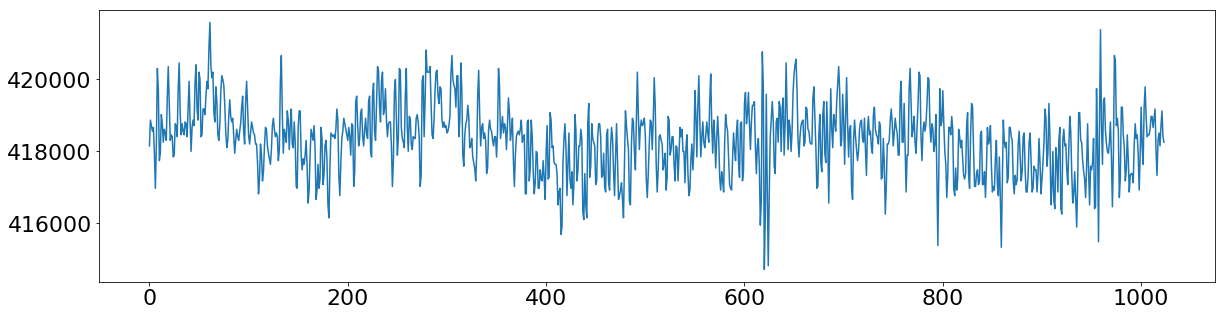

In [41]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(data[0][0:1024])
plt.savefig("signal")

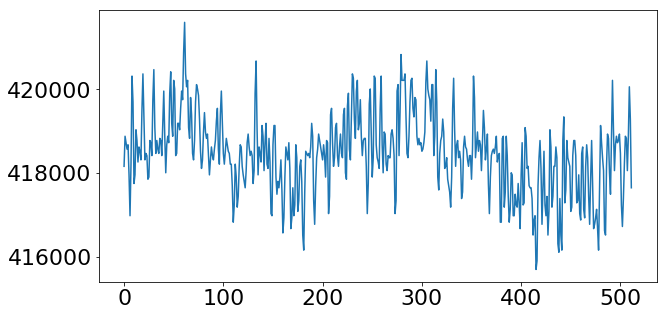

In [35]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(data[0][0:512])

plt.savefig("frame1")

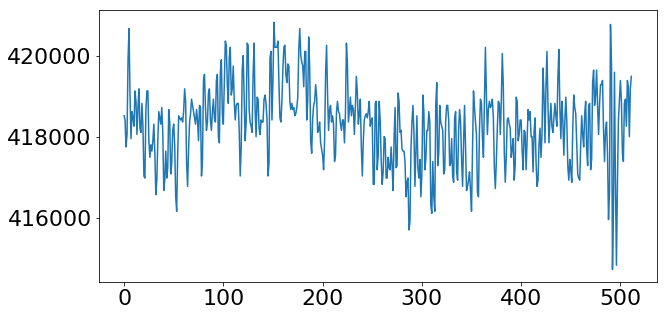

In [37]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(data[0][128:640])

plt.savefig("frame2")

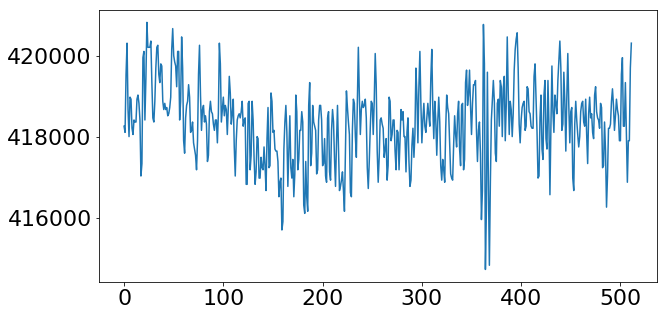

In [38]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(data[0][256:768])

plt.savefig("frame3")